In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [31]:
data = pd.read_csv("New_Data.csv")


In [32]:
data.head()


,age,"Your average cycle length (after how many days your period reoccur) example: 28,30"
0,22,28
1,22,29
2,22,28
3,22,29
4,22,29


In [33]:

data = data["Your average cycle length (after how many days your period reoccur) example: 28,30"]

In [34]:
#Make sure there are no null values
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
data.isnull().value_counts()

False    43
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

In [36]:
#Check the datatypes
print(data.dtypes)

int64


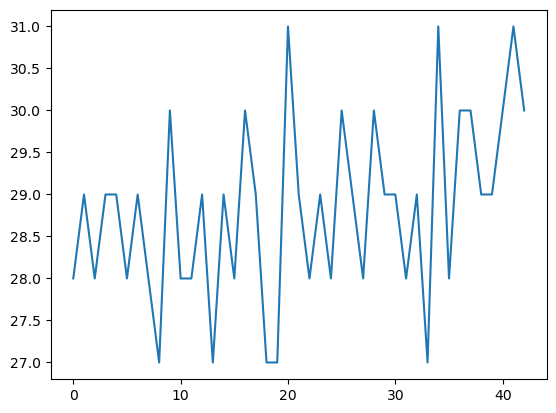

In [37]:
import matplotlib.pyplot as plt
plt.plot(data)

In [38]:
data.dtypes

dtype('int64')

In [39]:
data.head()

0    28
1    29
2    28
3    29
4    29
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

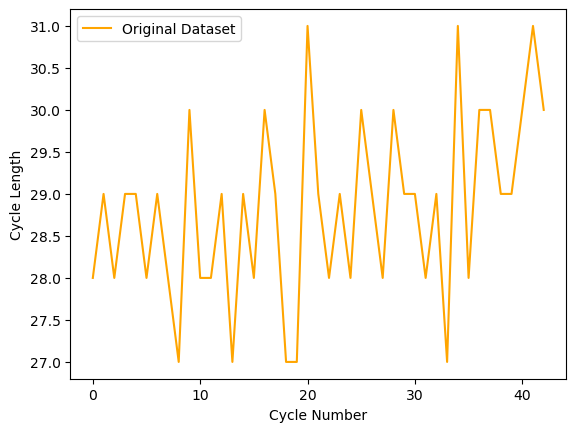

In [40]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [41]:
#Set the index of the Month 
#data.set_index('Timestamp',inplace=True)


In [42]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.04205047915206072, False)

<AxesSubplot: >

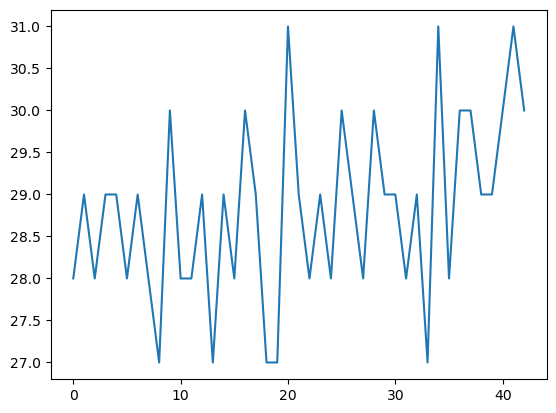

In [43]:
data.plot()

In [44]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    pvalue = result[1]
    if pvalue < 0.05:
        print("The data is stationary with p-value", pvalue)
    else:
        print("The data is not stationary with p-value", pvalue)
    
    return pvalue

# check for stationarity in the data
pvalue = check_stationarity(data)

# apply differencing to make the data stationary if necessary
if pvalue >= 0.05:
    differenced_data = data.diff().dropna()
    check_stationarity(differenced_data)
else:
    differenced_data = data




The data is stationary with p-value 2.8279475168623955e-10


In [45]:
print(differenced_data)

0     28
1     29
2     28
3     29
4     29
5     28
6     29
7     28
8     27
9     30
10    28
11    28
12    29
13    27
14    29
15    28
16    30
17    29
18    27
19    27
20    31
21    29
22    28
23    29
24    28
25    30
26    29
27    28
28    30
29    29
30    29
31    28
32    29
33    27
34    31
35    28
36    30
37    30
38    29
39    29
40    30
41    31
42    30
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64


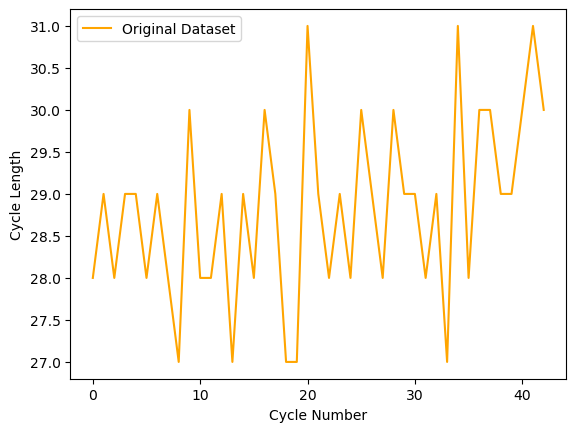

In [46]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [117]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = differenced_data # dataset

train_size = 0.75
test_size = 1 - train_size
X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [118]:
X_train.tail()

27    28
28    30
29    29
30    29
31    28
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

In [119]:
X_test.tail()

38    29
39    29
40    30
41    31
42    30
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

In [120]:
X_test.head()

32    29
33    27
34    31
35    28
36    30
Name: Your average cycle length (after how many days your period reoccur) example: 28,30, dtype: int64

Text(0, 0.5, 'CycleLength')

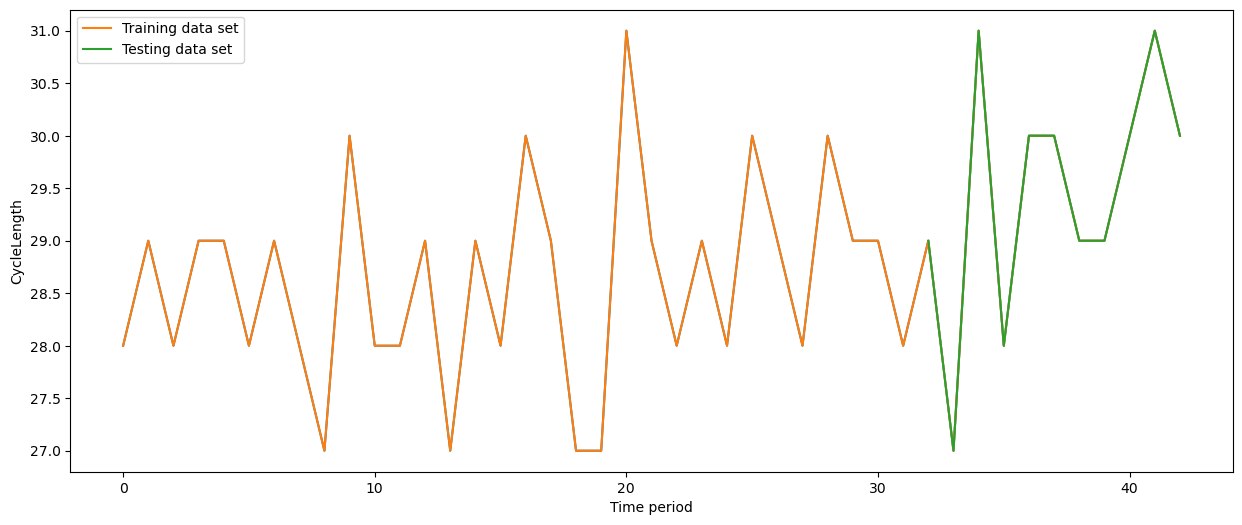

In [121]:
plt.figure(figsize=(15,6))
plt.plot(data)
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.plot(data,label="Training data set")
#plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test, color='orange', label='test')
plt.plot(X_test,label="Testing data set")
plt.xlabel('Time period')
plt.legend(loc = 'best')
plt.ylabel('CycleLength')



In [122]:
arima_model =  auto_arima(X_train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=0, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=4, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=104.734, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=93.337, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=102.800, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=99.903, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=93.855, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=93.397, Time=0.01 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=93.198, Time=0.02 sec
 ARIMA(2,0,0)(0,1,0)[4] intercept   : AIC=96.981, Time=0.02 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=92.632, Time=0.03 sec
 ARIMA(2,0,0)(3,1,0)[4] intercept   : AIC=90.734, Time=0.05 sec
 ARIMA(2,0,0)(4,1,0)[4] intercept   : AIC=92.658, Time=0.07 sec
 ARIMA(

In [123]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
32,29.949106
33,29.482642
34,28.337201
35,27.933927
36,30.456414
37,29.469912
38,28.665402
39,28.640290
40,29.539464
41,29.894316


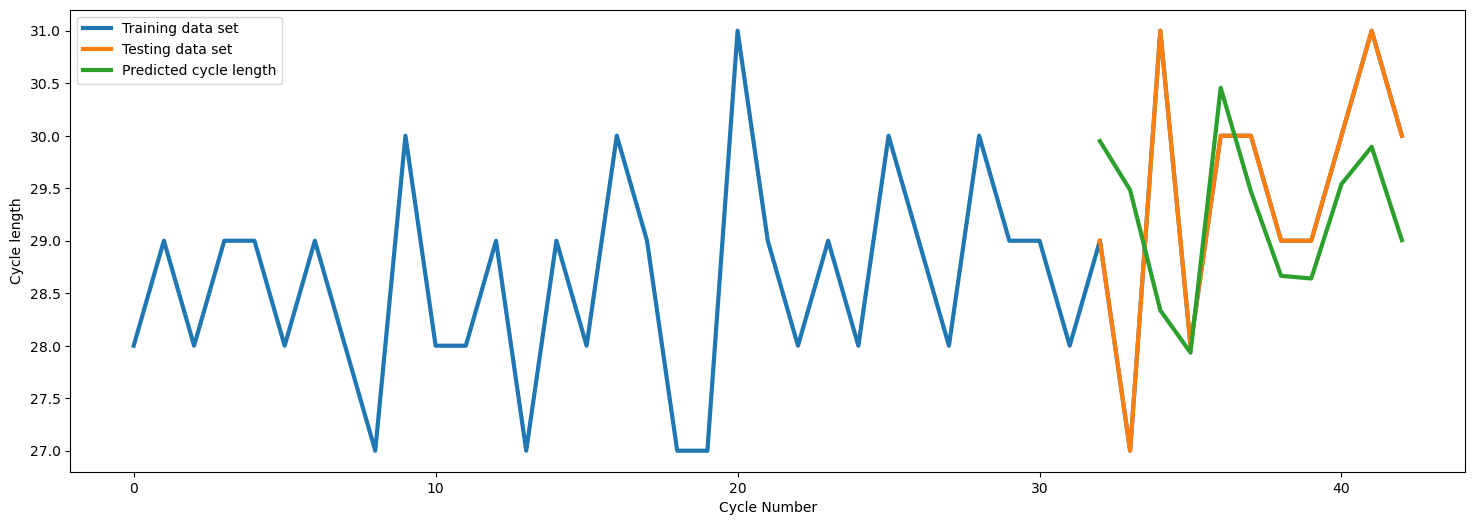

In [126]:
plt.figure(figsize=(18,6))
plt.plot(data,label="Training data set",linewidth=3)
plt.plot(X_test,label="Testing data set",linewidth=3)
plt.plot(prediction,label="Predicted cycle length",linewidth=3)
plt.legend(loc = 'best')
plt.xlabel("Cycle Number")
plt.ylabel("Cycle length")
plt.show()

In [26]:
X_full = pd.concat([X_train, X_test])
arima_model.fit(X_full)
future_predictions = arima_model.predict(n_periods=10)

future_predictions_df = pd.DataFrame(future_predictions, index=pd.date_range(start=X_test.index[-1], periods=10, freq='D'))
future_predictions_df.columns = ['predicted_Cyclelength']



In [27]:
print(future_predictions)

43    28.290351
44    30.188824
45    29.862086
46    29.872200
47    28.633867
48    30.024282
49    29.458379
50    30.502798
51    28.701639
52    30.371041
dtype: float64


In [28]:
future=future_predictions+X_test

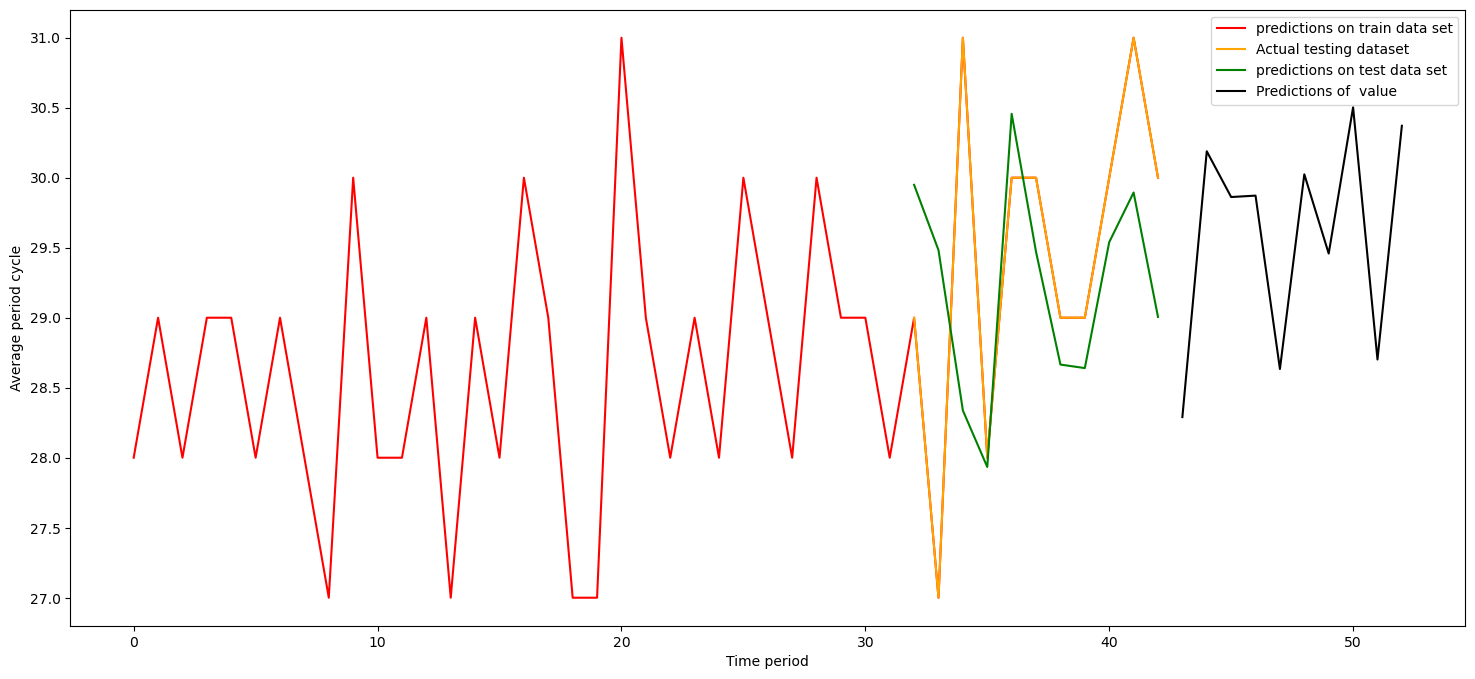

In [104]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])

plt.figure(figsize=(18,8))

plt.plot(data,label='predictions on train data set',color='red')
plt.plot(X_test, label = 'Actual testing dataset', color='orange')
# Plot the past values and future predictions
plt.plot(prediction,label='predictions on test data set',color='green')
#plt.plot(future, label = 'Predictions of future value')
plt.plot(future_predictions, label = 'Predictions of  value',color='black')


plt.legend(loc='best')
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.show()

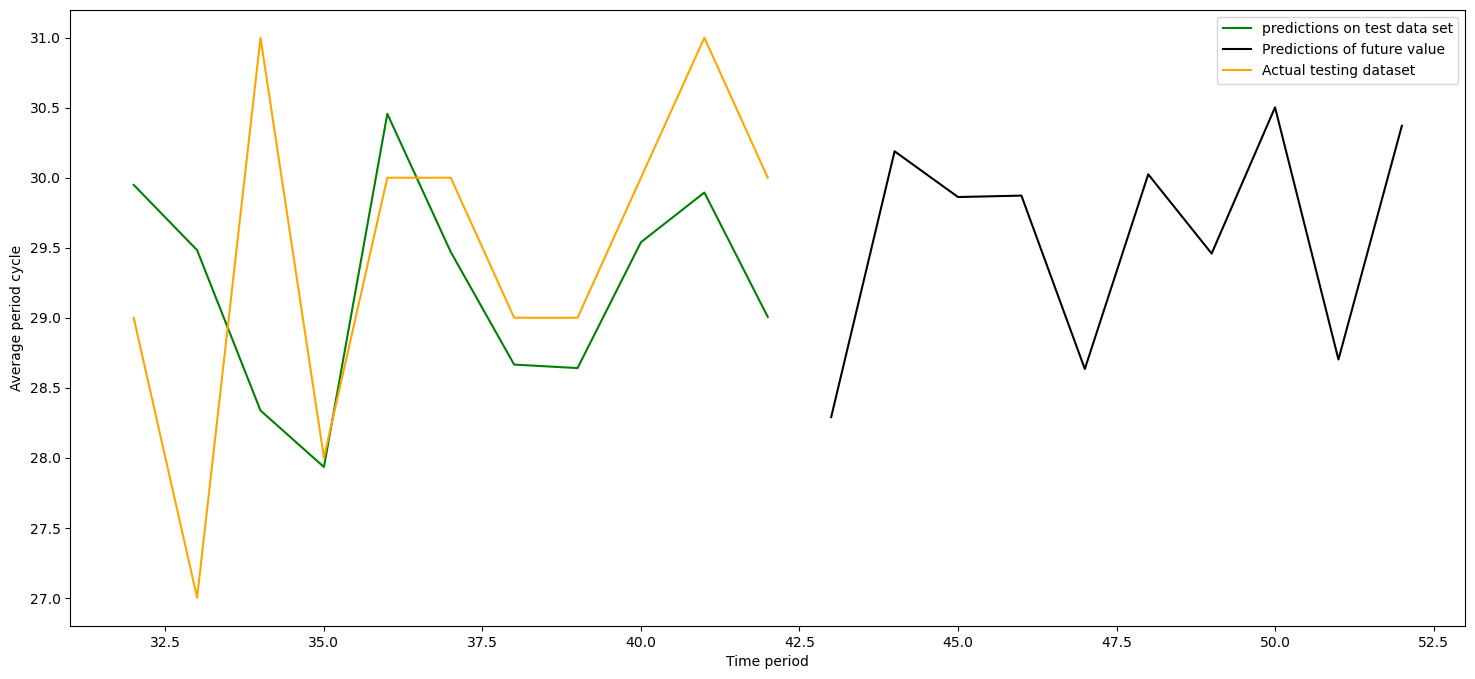

In [106]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])
plt.figure(figsize=(18,8))
# Plot the past values and future predictions
plt.plot(prediction,label='predictions on test data set',color='green')
plt.plot(future_predictions, label = 'Predictions of future value',color='black')

plt.plot(X_test, label = 'Actual testing dataset', color='orange')
plt.legend(loc='best')
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.show()